In [36]:
import dLuxToliman as dlT
import matplotlib.pyplot as plt
import jax.random as jr
import jax.numpy as np

In [47]:
param_list = [
    'x_position',
    'y_position',
    'separation',
    'position_angle',
    'log_flux',
    'contrast',
    ]

values = [
    1,
    1,
    10,
    90,
    6,
    3,
]

optics = dlT.TolimanOptics(psf_npixels=128, psf_oversample=1.5)
source = dlT.AlphaCen().set(param_list, values)
telescope = dlT.Toliman(optics, source)
psf = telescope.model()

# adding noise
psf_photon = jr.poisson(jr.PRNGKey(0), psf)
bg_noise = 3 * jr.normal(jr.PRNGKey(0), psf_photon.shape)
data = psf_photon + np.abs(bg_noise)

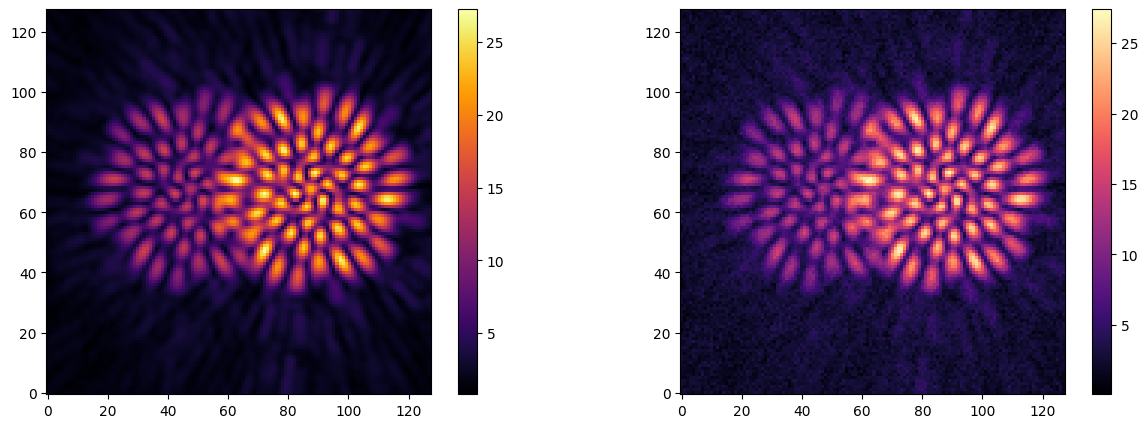

In [48]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
c1 = ax[0].imshow(psf**.5, cmap = 'inferno', origin='lower')
fig.colorbar(c1)

c2 = ax[1].imshow(data**.5, cmap='magma', origin='lower')
fig.colorbar(c2)

plt.show()